# Introduction to Random Forest algorithm


Random Forest is a powerful supervised learning algorithm that comes in two primary variants—one tailored for classification tasks and the other for regression. Renowned for its flexibility and ease of implementation, Random Forest operates by constructing multiple decision trees from various subsets of the training data. Each tree independently provides a prediction, and the algorithm aggregates these predictions—using majority voting for classification or averaging for regression—to arrive at the final output. Beyond its predictive capabilities, Random Forest is also highly effective in estimating feature importance, making it a valuable tool for both modeling and interpretation.

## Objective
To develop a Random Forest Classifier that accurately predicts the safety level of cars based on various input features. The goal is to utilize the ensemble learning capability of Random Forest to handle classification tasks effectively, ensuring high performance, robustness against overfitting, and interpretability through feature importance analysis.

# Import & Install Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'

df = pd.read_csv(r"C:\Users\ansar\OneDrive\Desktop\Machine-Learning-Projects\Supervised Learning\RandomForestClassifier\car_evaluation.csv")

## Checking Data

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
df.shape

(1727, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [16]:
df.isnull().sum()

BuyingPrice         0
Maintenance         0
No: of doors        0
PersonsCapacity     0
LuggageBootSpace    0
Safety              0
Class               0
dtype: int64

# **Exploratory data analysis**

## Renaming Column Names
Dataset does not have proper names for columns so we should rename them

In [13]:
col_names = ['BuyingPrice', 'Maintenance', 'No: of doors', 'PersonsCapacity', 'LuggageBootSpace', 'Safety', 'Class']


df.columns = col_names

col_names

['BuyingPrice',
 'Maintenance',
 'No: of doors',
 'PersonsCapacity',
 'LuggageBootSpace',
 'Safety',
 'Class']

In [14]:
df.head()

,BuyingPrice,Maintenance,No: of doors,PersonsCapacity,LuggageBootSpace,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Frequency count of categorical variables.

In [15]:
for col in col_names:
    
    print(df[col].value_counts())   

BuyingPrice
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
Maintenance
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
No: of doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
PersonsCapacity
4       576
more    576
2       575
Name: count, dtype: int64
LuggageBootSpace
med      576
big      576
small    575
Name: count, dtype: int64
Safety
med     576
high    576
low     575
Name: count, dtype: int64
Class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [29]:
count_plot_fields = [i for i in df.columns if df[i].nunique()]  # list comprehension
count_plot_fields

['BuyingPrice',
 'Maintenance',
 'No: of doors',
 'PersonsCapacity',
 'LuggageBootSpace',
 'Safety',
 'Class']

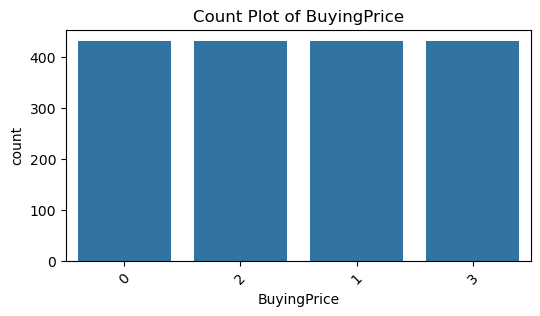

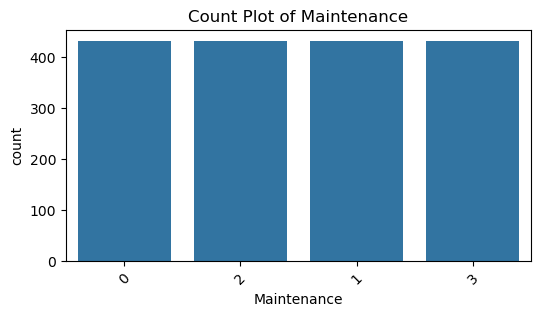

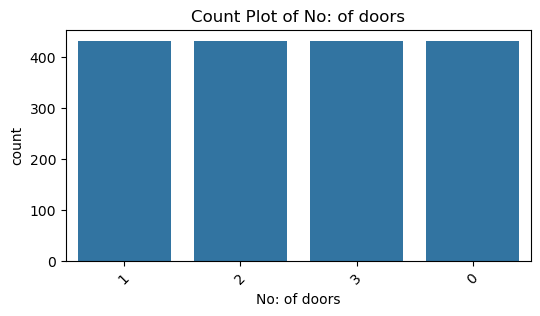

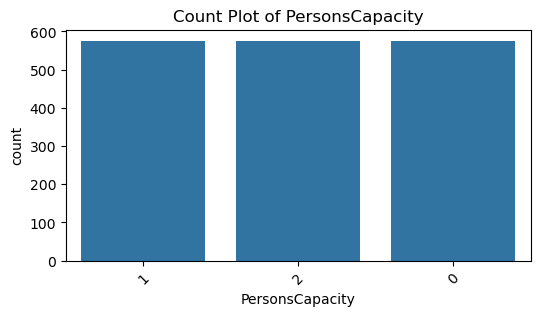

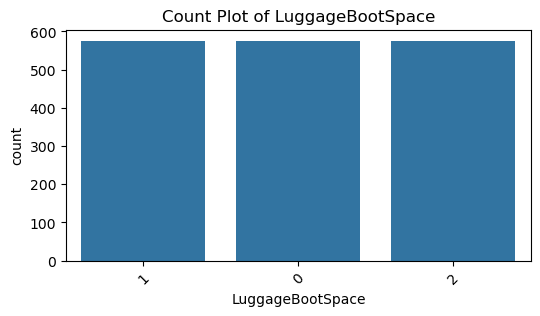

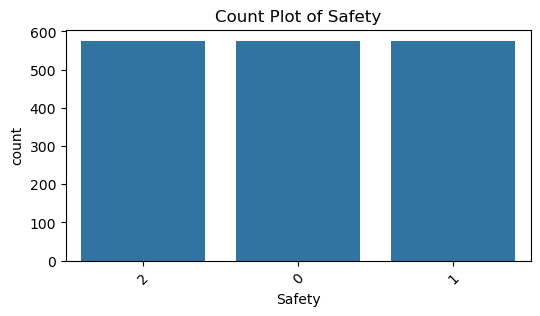

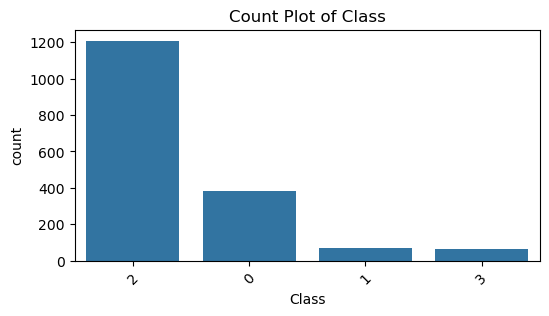

In [30]:
for col in df.columns:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

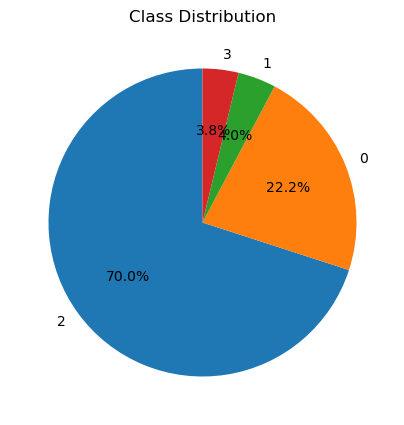

In [31]:
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(5,5), title='Class Distribution')
plt.ylabel('')
plt.show()

### Label Encoding

In [33]:
# Label Encoding
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])